In [1]:
import os

import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from remove_and_retrain import *
from misc_functions import *


In [12]:
data_path = "dataset"
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
config = {'batch_size': 10, 
          'data_directory': 'dataset', 
          'device': 'cuda:0', 
          'epochs': 2, 
          'grads': ['fullgrad', 'inputgrad'], 
          'img_size': 32, 
          'initial_learning_rate': 0.001, 
          'k': [0.1, 0.25, 0.5, 0.75, 0.9], 
          'lr_decresing_step': 1, 
          'lr_gamma': 0.1, 
          'max_train_steps': 10, 
          'most_salient': 'True', 
          'n_random_runs': 5, 
          'phase': 'train_initial_model', 
          'print_step': 2, 
          'replacement': 'black'}

unnormalize = NormalizeInverse(mean = [0.485, 0.456, 0.406],
                               std = [0.229, 0.224, 0.225])

# Remove and Retrain

## Dataset
For this experiment we have used Cifar10, while in the originl paper Cifar100 was used.
Below there are a few images that we will use in this experiment.

In [3]:
# load dataset
train_loader, test_loader = load_cifar_dataset(data_path, config)

Files already downloaded and verified
Files already downloaded and verified


/home/anca/.local/lib/python3.6/site-packages/torchvision/transforms/functional.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean, dtype=torch.float32)
/home/anca/.local/lib/python3.6/site-packages/torchvision/transforms/functional.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std, dtype=torch.float32)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clippi

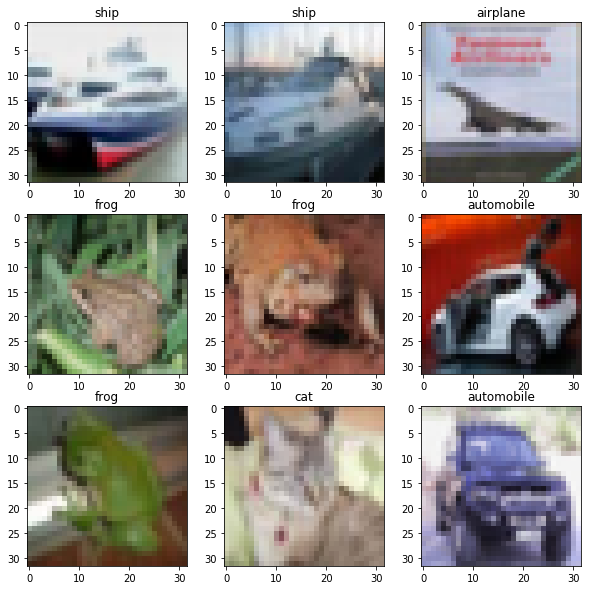

In [4]:
# display one batch
batch, target = next(iter(test_loader))

(ch, r, c) = batch[0].size()

fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3
for idx in range(1, columns*rows +1):
    image = unnormalize(batch[idx,:,:,:])
    img = [[[image[i, k, j] for i in range(ch)] for j in range (c)] for k in range(r)]
    ax = fig.add_subplot(rows, columns, idx)
    ax.title.set_text(labels[target[idx]])
    plt.imshow(img)

plt.show()

## Initial training

[2020-01-31 23:23] Train Step 0002/0000, Batch Size = 10, Accuracy = 0.10, Train Loss = 2.316
[2020-01-31 23:23] Train Step 0004/0000, Batch Size = 10, Accuracy = 0.15, Train Loss = 2.298
[2020-01-31 23:23] Train Step 0006/0000, Batch Size = 10, Accuracy = 0.25, Train Loss = 2.270
[2020-01-31 23:23] Train Step 0008/0000, Batch Size = 10, Accuracy = 0.15, Train Loss = 2.287
[2020-01-31 23:23] Train Step 0002/0000, Batch Size = 10, Accuracy = 0.15, Train Loss = 2.421
[2020-01-31 23:23] Train Step 0004/0000, Batch Size = 10, Accuracy = 0.00, Train Loss = 2.365
[2020-01-31 23:23] Train Step 0006/0000, Batch Size = 10, Accuracy = 0.00, Train Loss = 2.412
[2020-01-31 23:23] Train Step 0008/0000, Batch Size = 10, Accuracy = 0.10, Train Loss = 2.372
0.07999999821186066 0.07888106256723404


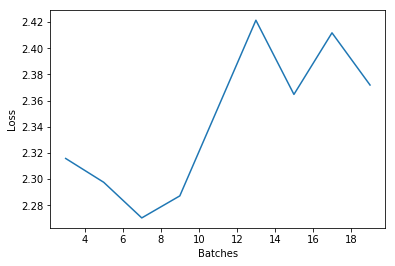

In [5]:
# really short training session

# VGG11 neural network
initial_model = init_model(config)

train(initial_model, config, data_loader=train_loader, plot_name="temp_initial_model")

initial_accuracy_mean, initial_accuracy_std = test(initial_model, config, data_loader=test_loader)
print(initial_accuracy_mean, initial_accuracy_std)

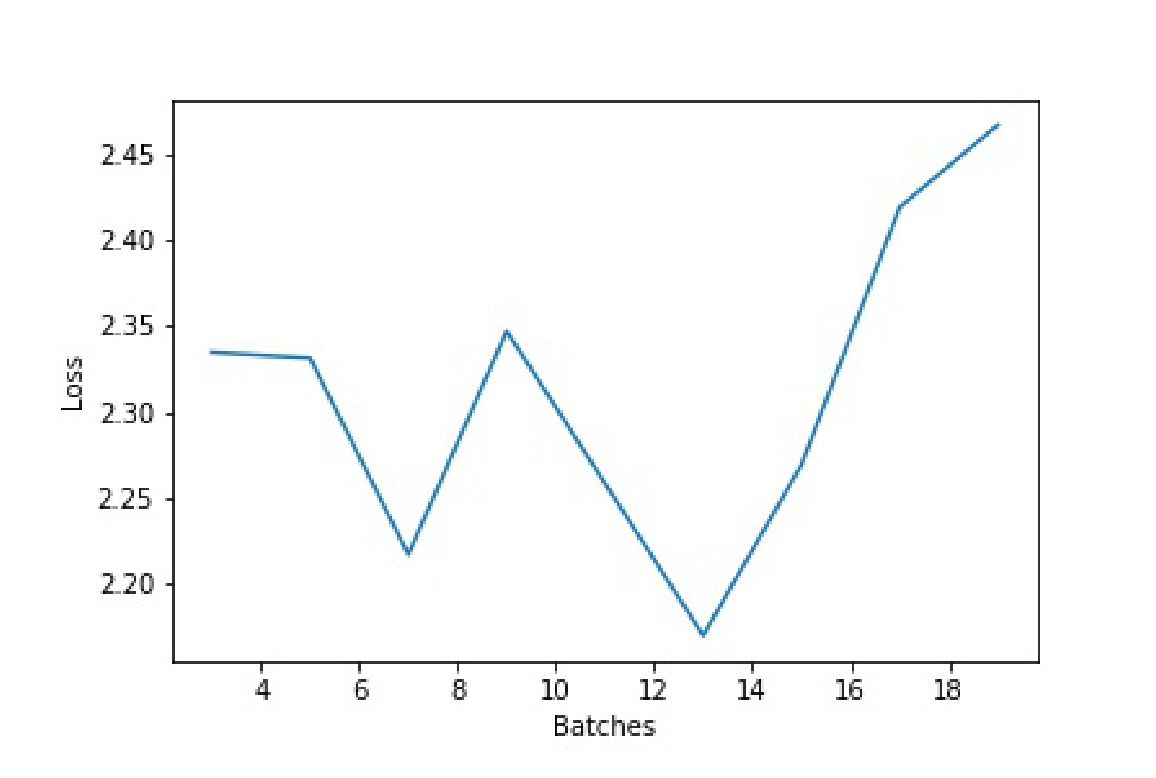

In [6]:
# Load and display already trained model
initial_model = torch.load(os.path.join("results", "remove_and_retrain",
                                        "models", "initial_model"))
img = mpimg.imread(os.path.join("results", "remove_and_retrain",
                                "plots", "initial_model.jpg"))
fig=plt.figure(figsize=(20, 20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

## Create Modified dataset

In [7]:
# compute and save modified dataset
compute_modified_datasets(train_loader, test_loader, os.path.join(data_path, "temp"), config)

/home/anca/.local/lib/python3.6/site-packages/torchvision/transforms/functional.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean, dtype=torch.float32)
/home/anca/.local/lib/python3.6/site-packages/torchvision/transforms/functional.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std, dtype=torch.float32)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clippi

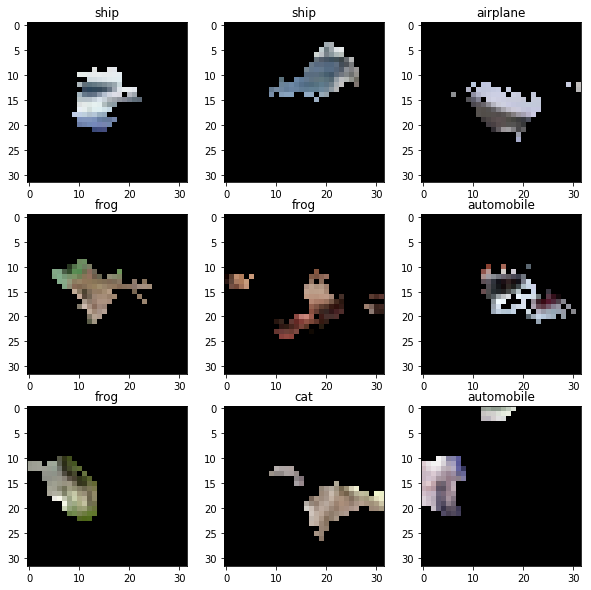

In [8]:
# Visualize modified dataset
#90% of the pixels are removed
k = "921" 
batch = torch.load(os.path.join("dataset", "modified_cifar_10", "FullGrad", k, "test", "batch_input0"))
target = torch.load(os.path.join("dataset", "modified_cifar_10", "FullGrad", k, "test", "batch_target0"))
(ch, r, c) = batch[0].size()

fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3
for idx in range(1, columns*rows +1):
    image = unnormalize(batch[idx,:,:,:])
    img = [[[image[i, k, j] for i in range(ch)] for j in range (c)] for k in range(r)]
    ax = fig.add_subplot(rows, columns, idx)
    ax.title.set_text(labels[target[idx]])
    plt.imshow(img)

plt.show()

## Train on modified dataset

Run saliency method:  FullGrad
dataset/modified_cifar_10/FullGrad/102
[2020-01-31 23:25] Train Step 0002/0000, Batch Size = 10, Accuracy = 0.25, Train Loss = 2.315
[2020-01-31 23:25] Train Step 0004/0000, Batch Size = 10, Accuracy = 0.05, Train Loss = 2.412
[2020-01-31 23:25] Train Step 0006/0000, Batch Size = 10, Accuracy = 0.00, Train Loss = 2.508
[2020-01-31 23:25] Train Step 0008/0000, Batch Size = 10, Accuracy = 0.15, Train Loss = 2.330
[2020-01-31 23:25] Train Step 0002/0000, Batch Size = 10, Accuracy = 0.15, Train Loss = 2.314
[2020-01-31 23:25] Train Step 0004/0000, Batch Size = 10, Accuracy = 0.25, Train Loss = 2.265
[2020-01-31 23:25] Train Step 0006/0000, Batch Size = 10, Accuracy = 0.05, Train Loss = 2.298
[2020-01-31 23:25] Train Step 0008/0000, Batch Size = 10, Accuracy = 0.10, Train Loss = 2.502
Run saliency method:  FullGrad
dataset/modified_cifar_10/FullGrad/256
[2020-01-31 23:25] Train Step 0002/0000, Batch Size = 10, Accuracy = 0.05, Train Loss = 2.412
[2020-01-31 23

[10.0, 25.0, 50.0, 75.0, 90.0]
[0.0, 0.019999999552965164, 0.0, 0.0, 0.0]
[0.0, 0.042163703590631485, 0.0, 0.0, 0.0]


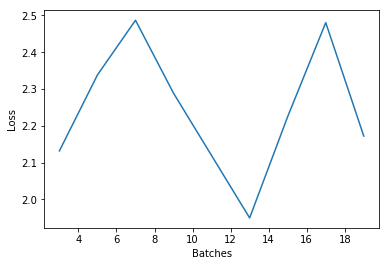

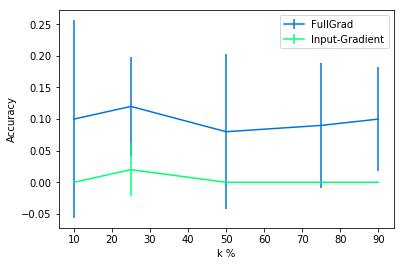

In [13]:
# Reads the previously modified datasets and retrains the models
remove_and_retrain(data_path, config, addition="temp_")

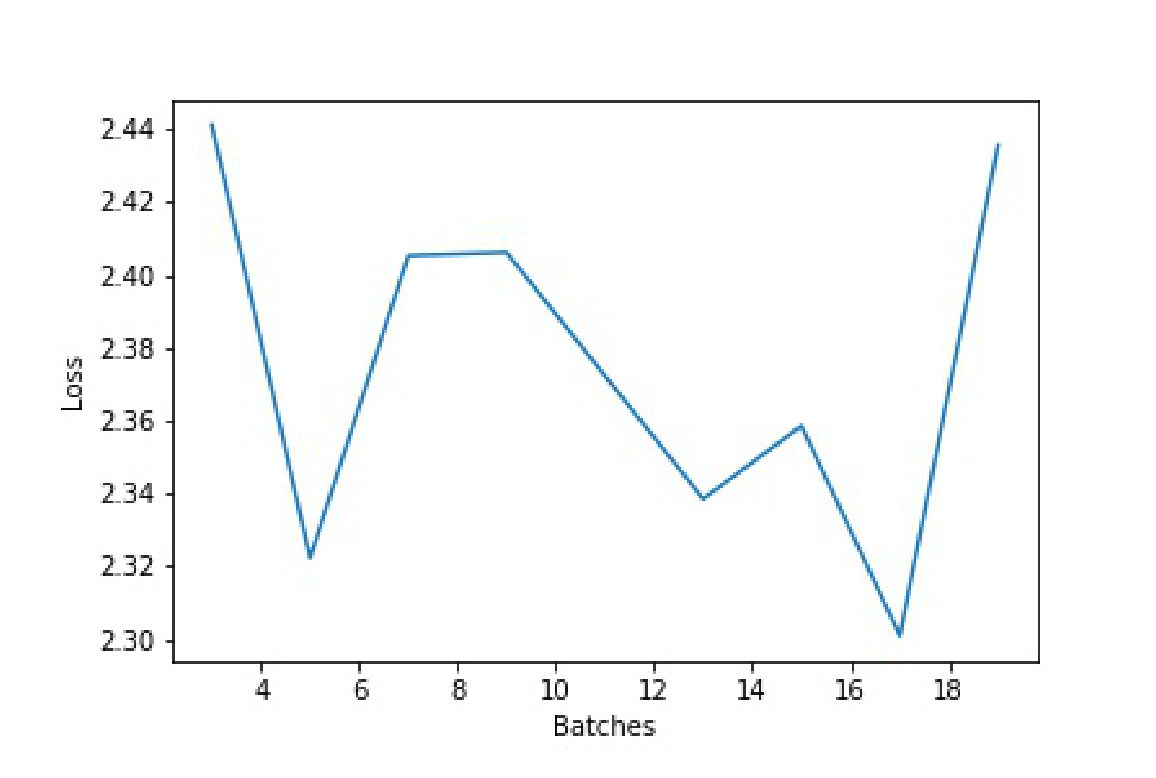

In [10]:
# Load the plots of an already trained models
initial_model = torch.load(os.path.join("results", "remove_and_retrain",
                                        "models", "initial_model"))
img = mpimg.imread(os.path.join("results", "remove_and_retrain",
                                "plots", "FullGrad_0.5.jpg"))
fig=plt.figure(figsize=(20, 20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

## Final result

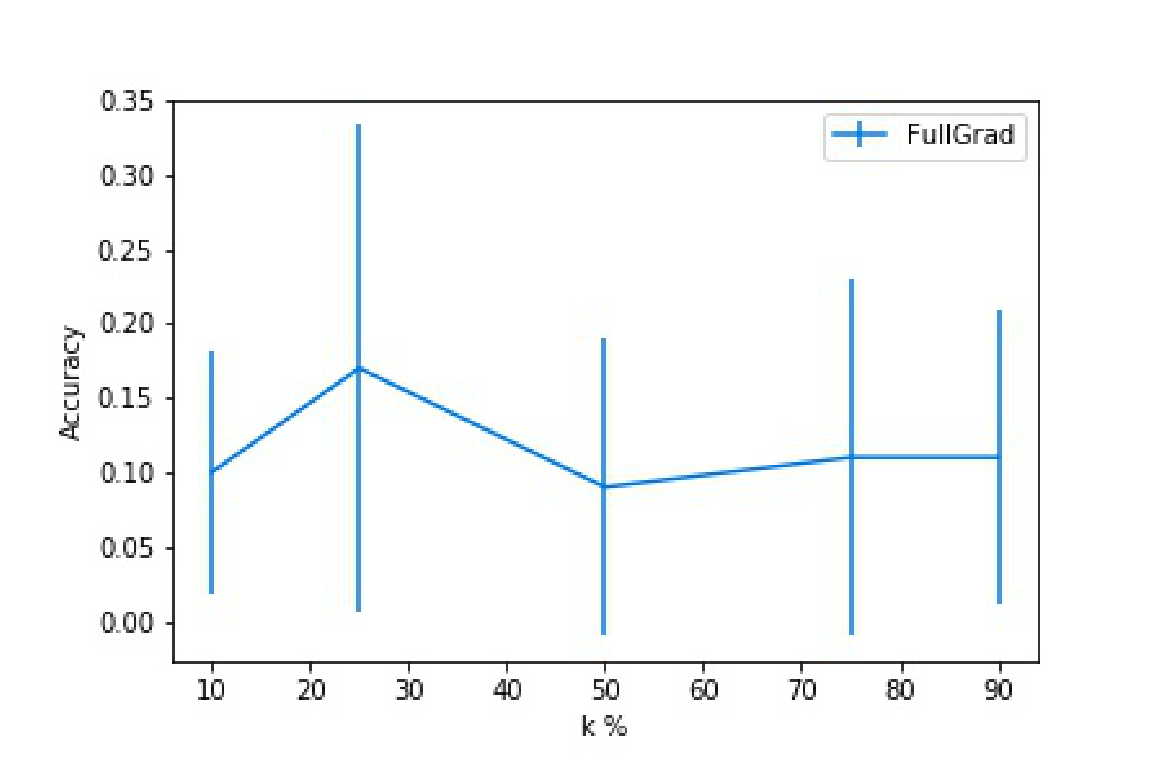

In [11]:
# Load the final results
initial_model = torch.load(os.path.join("results", "remove_and_retrain",
                                        "models", "initial_model"))
img = mpimg.imread(os.path.join("results", "remove_and_retrain", "final_plot.jpeg"))
fig=plt.figure(figsize=(20, 20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()